In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

## Task1

Define a class called KMeans that takes the number of clusters in the initialization step and implements a fit method that takes a numpy ndarray and returns the clusters assigned to each data point. \
Don't use sklearn implementation, do it yourself.

In [2]:
randi_arr = np.random.randint(1,5,100)
randi_arr

array([3, 3, 2, 4, 4, 2, 3, 4, 1, 1, 4, 2, 2, 1, 4, 3, 3, 2, 4, 2, 2, 3,
       1, 2, 1, 2, 4, 2, 4, 1, 1, 1, 1, 4, 3, 1, 1, 4, 4, 2, 3, 2, 1, 1,
       4, 4, 3, 4, 4, 1, 2, 3, 3, 2, 2, 4, 2, 1, 1, 1, 1, 2, 4, 3, 4, 2,
       4, 3, 1, 2, 3, 4, 4, 2, 4, 3, 2, 1, 2, 3, 3, 4, 4, 3, 1, 3, 2, 1,
       4, 2, 1, 4, 3, 2, 4, 3, 3, 3, 2, 2])

In [3]:
A = np.array([4, 7, 3, 4, 2, 8])
B = (A == 4)
B
C = A[B]
np.sum(C), len(C)

(8, 2)

In [4]:
class KMeans:
    def __init__(self, n_clusters):
        self.clusters = n_clusters
    def fit(self, data):
        clust_label=np.random.randint(0,self.clusters, len(data))
        while( True ):
            clust_cent = []
            #print("Hello")
            for i in range(0,self.clusters):
                ind = (clust_label == i)
                #print(data[ind])
                clust_cent.append(sum((data[ind]) / len(ind)))
            iter_clust = clust_label.copy()
            #print(clust_cent)
            for i in range(len(data)):
                minn = []
                for j in range(len(clust_cent)):
                    minn.append(np.linalg.norm(data[i]-clust_cent[j])) 
                clus = minn.index(min(minn))
                clust_label[i] = clus
            if (iter_clust == clust_label).all():
                return clust_label

Test the solution on the toy dataset

In [5]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X[0]


array([0.84022039, 1.14802236])

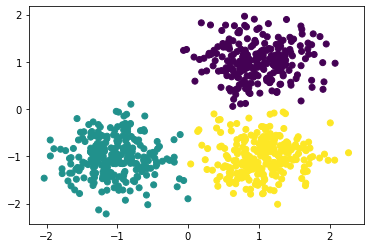

In [6]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit(X)
plt.scatter(X[:,0], X[:,1], c=clusters)

In [7]:
def manhattan(a, b):
   # print(a,b)
    return sum(abs(a[i]-b[i]) for i in range(len(a)))

## Task2
implement KMedians algorithm, which is the same as KMeans, only using medians for centroid assignment. Use $l_1$ distance as a distance function

In [66]:
class KMedians:
    def __init__(self, n_clusters):
        self.clusters = n_clusters
    def fit(self, data):
        c = 0
        while( True ):
            c+=1
            clust_cent = []
            clust_label=np.random.randint(0,self.clusters, len(data))
            for i in range(0,self.clusters):
                ind = (clust_label == i)
                clust_cent.append((data[ind]).mean(axis=0))
            iter_clust = clust_label.copy()
            for i in range(len(data)):
                minn = []
                for j in range(len(clust_cent)):
                    minn.append(manhattan(data[i],clust_cent[j])) 
                clus = minn.index(min(minn))
                clust_label[i] = clus
            if (iter_clust == clust_label).all():
                return clust_label

In [ ]:
kmedians = KMedians(n_clusters=3)
clusters = kmedians.fit(X)
plt.scatter(X[:,0], X[:,1], c=clusters)

# Task3

In [18]:
dat = np.load(open('./data.npy', 'rb'))

In [19]:
dat.shape

(5000, 6)

Data is high dimensional, and at this moment we can't plot it to count the number of clusters \
Use both elbow method and silhouette score to find the number of clusters. Which one helped the most? \
Use sklearn implementation of KMeans for both methods.


Hint: true number of clusters is less than 20 \
Hint: sil_score = silhouette_score(dat, model.labels_)

silhouette_score was more simple.

In [33]:
from sklearn.cluster import KMeans

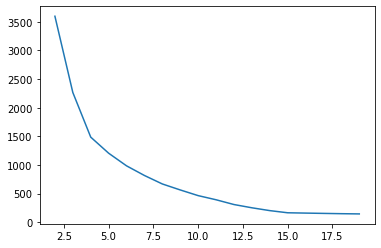

In [64]:

wss = []
for k in range(2,20):
    km = KMeans(n_clusters = k)
    km.fit(dat)
    wss.append(km.inertia_)
plt.plot(range(2,20),wss)



In [60]:
# Then use silhouette score

for k in range(2,20):
    km = KMeans(n_clusters = k)
    km.fit(dat)
    score = silhouette_score(dat, km.labels_, metric='euclidean')
    print(score, "k = ",k)


0.4070907782143096 k =  2
0.4202470703586448 k =  3
0.44676782250980923 k =  4
0.43358445589018557 k =  5
0.41985858661837755 k =  6
0.46455752368216663 k =  7
0.45744440104841516 k =  8
0.4822816819535619 k =  9
0.5182675448184544 k =  10
0.5361815182067629 k =  11
0.5608888498604582 k =  12
0.5826335570058794 k =  13
0.6115935012511389 k =  14
0.6260718828357553 k =  15
0.6069984855744928 k =  16
0.5938826422089672 k =  17
0.5716862557280981 k =  18
0.5548201363703439 k =  19


In [61]:
num_clusters = 15
model = KMeans(n_clusters=num_clusters)
model.fit(dat)

KMeans(n_clusters=15)

use 3rd and 6th dimensions of the data to plot the results

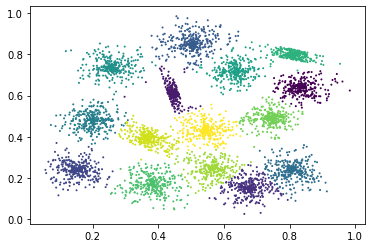

In [62]:
from sklearn.cluster import KMeans
plt.scatter(dat[:, 2], dat[:, 5], s=1, c=model.labels_)